In [1]:
import time
import datetime
import matplotlib.pyplot as plt
import ast
import pandas as pd
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set_palette(sns.husl_palette(9, s=0.7 ))
sns.set_style(style='white')
import plotly.express as px

df = pd.read_csv(r'C:\Users\ABC\Downloads\data_ted_talks.csv')


In [2]:
def show_head_tail(data):
    return pd.concat([data.head(), data.tail()], axis = 0)

def check_unique_and_top_ten(df, col, color):
    print(f'Unique values in column {col} are : {df[col].nunique()}')
    df[col].value_counts()[:10].plot(kind = 'bar', color=[color]);
    plt.xlabel(f'{col}');
    plt.ylabel('Count for a particular event');
    plt.title(f'{col} Vs count');


    


In [3]:
show_head_tail(df)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer

In [4]:
df.shape

(4005, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [6]:
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

> Comments, occupations and about_speakers have null values.


In [7]:
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [8]:
numerical, categorical = [], []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical.append(col)
    else:
        numerical.append(col)
        
print('Numerical columns are: ', numerical)
print()
print('Categorical columns are: ', categorical)

Numerical columns are:  ['talk_id', 'views', 'comments', 'duration']

Categorical columns are:  ['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'recorded_date', 'published_date', 'event', 'native_lang', 'available_lang', 'topics', 'related_talks', 'url', 'description', 'transcript']


### Checking for Event

In [27]:
series_with_events = df['event'].value_counts()[:10]

fig=px.pie(names=series_with_events.index,values=series_with_events.values,labels={
    "names":"Event names ",
    "values":"Number of talks "
},
title="Top 10 events with highest count",
color_discrete_sequence=px.colors.sequential.Bluyl
      )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#000000",title_font_size=20,title_x=.5,font_color="#bbb",
    plot_bgcolor="#D0D3D4",legend_title_font_size=17,legend_title_font_color="#fff",
    legend_title_text="Event names")
fig.update_yaxes(showgrid=False,visible=False,title="percent")
fig.update_xaxes(tickfont_size=9)
fig.update_traces(textfont_size=10)
fig.show()

Unique values in column native_lang are : 12


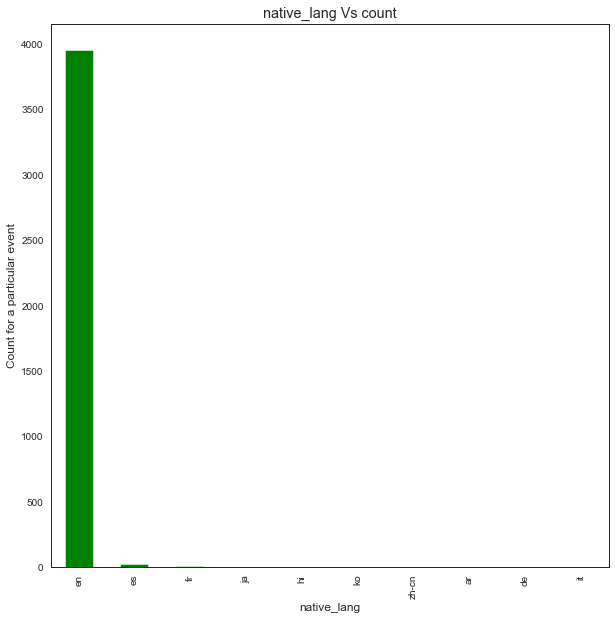

In [10]:
plt.figure(figsize = (10,10))
check_unique_and_top_ten(df, 'native_lang', 'g')


### Duration Column

Percentage of movies having run time greater than average:  0.5126092384519351
Number of movies having run time greater than average:      2053




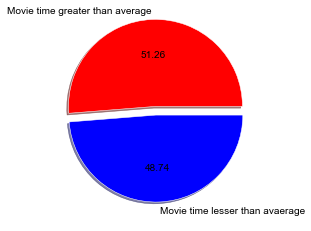

In [11]:
print('Percentage of movies having run time greater than average: ', len(df[df['duration'] > df['duration'].mean()])/ len(df))
print('Number of movies having run time greater than average:     ', len(df[df['duration'] > df['duration'].mean()]))
print()
print()
colors = ( "red", "blue")
explode = (0.1, 0)

categories = ['Movie time greater than average', 'Movie time lesser than avaerage']  
data = [len(df[df['duration'] > df['duration'].mean()])/ len(df), 1-len(df[df['duration'] > df['duration'].mean()])/ len(df)]

# Creating plot
fig = plt.figure(figsize =(10, 4))
plt.pie(data, labels = categories, explode = explode,autopct='%.2f', colors = colors, shadow = True,textprops = dict(color ="black") )
  
# show plot
plt.show()

## All_speakers

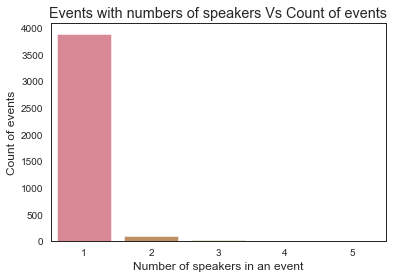

In [12]:
# There were Nan values but there type was wrong, I have changed them to str.
# I jhave also converted all strings to dictionaries
df['all_speakers'].fillna("{0:['NaN']}",inplace=True,axis=0)
df['all_speakers'] = df['all_speakers'].apply(ast.literal_eval)

sns.countplot(df['all_speakers'].apply(lambda x: len(x)));
plt.xlabel('Number of speakers in an event');
plt.ylabel('Count of events');
plt.title('Events with numbers of speakers Vs Count of events');


## Occupations

In [13]:
# Changing type of occupations column from str to dict
df['occupations'].fillna("{0:['NaN']}",inplace=True,axis=0)
df['occupations'] = df['occupations'].apply(ast.literal_eval)
df['extracted_occupations'] = df['occupations'].apply(lambda x:  x.values())


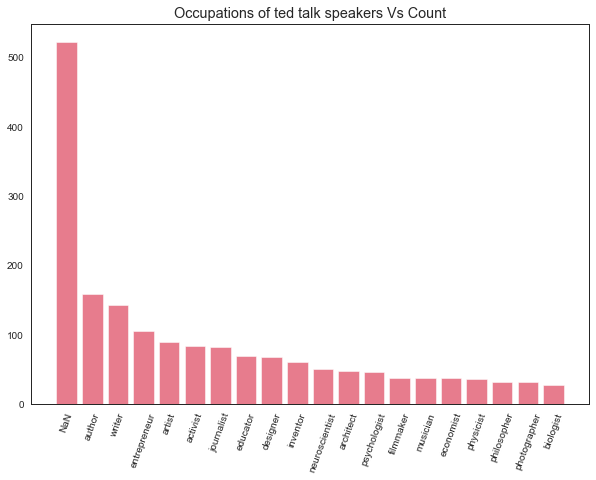

In [14]:
# Flattening the list of values from dictionary, replacing ',' with ';' as I would be splitting on that later
extracted_occupations_list_flattened = df['extracted_occupations'].apply(lambda x : ((';'.join(list(itertools.chain.from_iterable(x)))).replace(',', ';').split(';')))

# Creating a dictionary of occupations alongside their count
dict_occupation = {}
for main_list in extracted_occupations_list_flattened.values:
    for sub_list in main_list:
        if sub_list in dict_occupation:
            dict_occupation[sub_list]+=1
        else:
            dict_occupation[sub_list]=1

# Sorting the dictionary in descending order
sorted_dict_occupation = (sorted(dict_occupation.items(), key=lambda x: x[1], reverse=True))

# Taking top 20 professions according to count
sorted_dict_occupation_top_20 = sorted_dict_occupation[:20]

# PLotting top 20 professions
plt.figure(figsize = (10,7))
plt.bar(range(len(sorted_dict_occupation_top_20)), [val[1] for val in sorted_dict_occupation_top_20], align='center')
plt.xticks(range(len(sorted_dict_occupation_top_20)), [val[0] for val in sorted_dict_occupation_top_20])
plt.xticks(rotation=70)
plt.title('Occupations of ted talk speakers Vs Count');

plt.show()

In [15]:
df['about_speakers'].fillna("{0:['NaN']}",inplace=True,axis=0)
df['about_speakers'] = df['about_speakers'].apply(ast.literal_eval)


## Numerical Columns

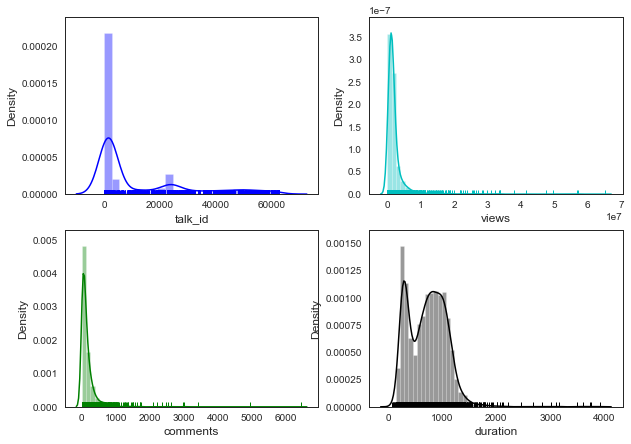

In [16]:
plt.figure(figsize = (10,15))
colours=['b','c','g','k']

for i in range(len(numerical)):
    sns.set_style(style='white')
    plt.subplot(4,2,i+1)
    sns.distplot(df[numerical[i]], hist=True, rug=True, color = colours[i])

> **All are right skewed.**

## Recorded Date Vs Published Date

In [17]:
# Index of Nan value
print('Index of row which has the nan value: ', df[df['recorded_date'].isna()].index[0])

df.drop(df[df['recorded_date'].isna()].index[0], inplace = True)

Index of row which has the nan value:  3831


In [18]:
df[df['published_date'].isna()]

df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime((x),"%Y-%m-%d"))
df['published_date']

0      2006-06-27
1      2006-06-27
2      2006-06-27
3      2006-06-27
4      2006-06-27
          ...    
4000   2020-04-27
4001   2020-04-27
4002   2020-04-28
4003   2020-04-30
4004   2020-04-30
Name: published_date, Length: 4004, dtype: datetime64[ns]

In [19]:

df['recorded_date'] = df['recorded_date'].apply(lambda x: datetime.datetime.strptime((x),"%Y-%m-%d"))

df['recorded_date'] 

0      2006-02-25
1      2006-02-22
2      2006-02-24
3      2006-02-26
4      2006-02-25
          ...    
4000   2020-04-22
4001   2020-04-27
4002   2019-06-22
4003   2020-04-28
4004   2020-04-30
Name: recorded_date, Length: 4004, dtype: datetime64[ns]

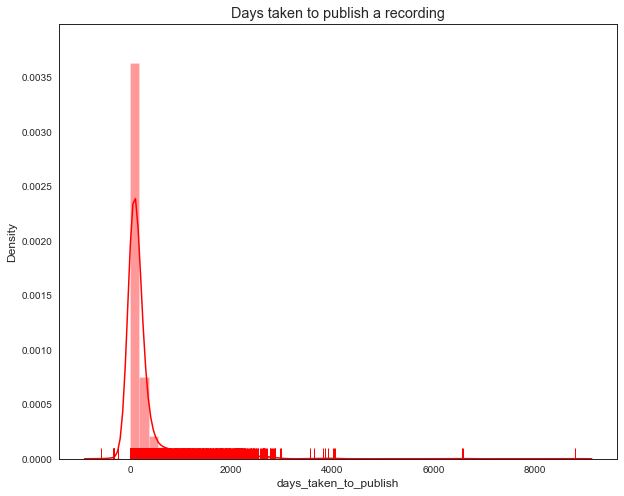

In [20]:
# Days taken for publishing the records from recording time
df['days_taken_to_publish'] = (df['published_date'] - df['recorded_date']).apply(lambda x :  x.days)
plt.figure(figsize = (10,8))
sns.distplot((df['days_taken_to_publish']), hist=True, rug=True, color = 'r');
plt.title('Days taken to publish a recording');

In [21]:
print("Average number of days for a record to get published: ", df['days_taken_to_publish'].mean())

Average number of days for a record to get published:  307.22227772227774


## Number of events published through the years

In [26]:

years = df["published_date"].dt.year.value_counts().sort_index(ascending=True)

fig=px.line(x=years.index,y=years.values,
           labels={"y":"Number of events","x":"Year"},
      title="Number of events published through the years",
       color_discrete_sequence=["#31bf9b"],
       range_x=[min(list(years.index)), max(list(years.index))],
      )
fig.update_layout(

    title_font_color="#fff",paper_bgcolor="#000000",title_font_size=20,title_x=.5,font_color="#bbb",
    plot_bgcolor="#D0D3D4")

fig.update_yaxes(showgrid=False,visible=False,title="percent of comments")
fig.update_xaxes(tickfont_size=9)

for i,value in enumerate(years[years==years.max()].index):
    fig.add_vline(x=value) 
fig.show() 

In [43]:
ratio_comments_by_views= df['comments']/df['views']
val         = ratio_comments_by_views.sort_values(ascending = False)[:10]
event_names = df.iloc[list(ratio_comments_by_views.sort_values(ascending = False)[:10].index.values)]['event'].values


fig = px.bar( x=event_names, y=val, title = 'ratio of comments by views for top 10 ted talk events', labels={'x': 'Event name','y':'ratio of comments by views'})

fig.show()